In [7]:
from langgraph.graph import Graph
from langgraph.graph import StateGraph
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
langgraph->orchestration->pipeline

In [ ]:
langgraph->nodes,edges,State
node->funtions
edage-> connectivity between nodes(funtions)

In [8]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [10]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [11]:
def LLM(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
    response=llm.invoke(input).content
    return response
    

In [12]:
def Counter_Token(input):
    token=input.split()
    token_number=len(token)
    response=f"total number of token in the generated output {token_number}"
    return response
    

In [15]:
workflow=Graph()

In [16]:
workflow.add_node("MY LLM",LLM)

In [17]:
workflow.add_node("Token Counter",Counter_Token)

In [18]:
workflow.add_edge("MY LLM", "Token Counter")

In [19]:
workflow.set_entry_point("MY LLM")
workflow.set_finish_point("Token Counter")

In [20]:
app=workflow.compile()

In [21]:
from IPython.display import Image, display

In [22]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langgraph.graph.graph.LangGraphInput'>, metadata=None), 'MY LLM': Node(id='MY LLM', name='MY LLM', data=MY LLM(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'Token Counter': Node(id='Token Counter', name='Token Counter', data=Token Counter(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langgraph.graph.graph.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='MY LLM', target='Token Counter', data=None, conditional=False), Edge(source='Token Counter', target='__end__', data=None, conditional=False), Edge(source='__start__', target='MY LLM', data=None, conditional=False)])

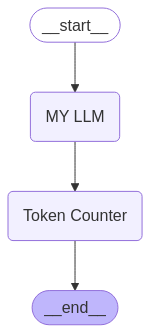

In [23]:
display(Image(app.get_graph().draw_mermaid_png())) 

In [24]:
app.invoke("what is a agentic ai explain me in very detailed manner?")

'total number of token in the generated output 584'

In [26]:
for output in app.stream("what is a agentic ai explain me in very detailed manner?"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from MY LLM
_______
Agentic AI refers to artificial intelligence systems designed to act autonomously and independently, exhibiting a sense of agency.  This means they can make decisions, take actions, and pursue goals without constant human intervention.  It's a significant leap from reactive or assistive AI, which simply respond to inputs or automate pre-defined tasks.  Let's break down the key aspects:

**1. Autonomy:** This is the cornerstone of agentic AI.  These systems aren't just executing pre-programmed instructions; they have a degree of freedom in how they achieve their objectives.  They can adapt to changing circumstances, learn from experience, and even formulate new strategies. This autonomy can range from simple decision-making within a defined scope (like a self-driving car navigating a route) to more complex, open-ended problem-solving.

**2. Goal-Oriented Behavior:** Agentic AI systems are driven by goals. These goals can be explicitly programmed by hum